In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import ta
import matplotlib.pyplot as plt

In [2]:
! pip config unset global.index-url


ERROR: No such key - global.index-url


In [3]:
! pip install yfinace


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement yfinace (from versions: none)
ERROR: No matching distribution found for yfinace


In [4]:
! pip install ta

Defaulting to user installation because normal site-packages is not writeable


In [5]:
! pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [6]:
df= yf.download('ITC.NS',start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,282.200012,283.549988,279.799988,282.700012,239.459137,2490548
2019-01-02,282.250000,283.250000,277.549988,280.600006,237.680328,9934187
2019-01-03,280.600006,282.450012,277.750000,278.850006,236.198013,6114946
2019-01-04,279.149994,282.950012,279.149994,280.950012,237.976807,7805148
2019-01-07,284.299988,285.250000,281.000000,281.649994,238.569717,9757529
...,...,...,...,...,...,...
2022-10-31,348.000000,350.500000,344.750000,348.700012,348.700012,13825970
2022-11-01,349.250000,350.500000,347.200012,349.500000,349.500000,19665200
2022-11-02,348.500000,356.250000,348.500000,354.649994,354.649994,16781507


In [8]:
df['ma_20']=df.Close.rolling(20).mean()
df['vol']= df.Close.rolling(20).std()
df['upper_bb']=df.ma_20+(2*df.vol)
df['lower_bb']=df.ma_20-(2*df.vol)
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2019-01-01,282.200012,283.549988,279.799988,282.700012,239.459137,2490548,NaN,NaN,NaN,NaN
2019-01-02,282.250000,283.250000,277.549988,280.600006,237.680328,9934187,NaN,NaN,NaN,NaN
2019-01-03,280.600006,282.450012,277.750000,278.850006,236.198013,6114946,NaN,NaN,NaN,NaN
2019-01-04,279.149994,282.950012,279.149994,280.950012,237.976807,7805148,NaN,NaN,NaN,NaN
2019-01-07,284.299988,285.250000,281.000000,281.649994,238.569717,9757529,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-31,348.000000,350.500000,344.750000,348.700012,348.700012,13825970,337.685001,8.542774,354.770549,320.599452
2022-11-01,349.250000,350.500000,347.200012,349.500000,349.500000,19665200,338.550000,8.829214,356.208429,320.891571
2022-11-02,348.500000,356.250000,348.500000,354.649994,354.649994,16781507,340.062500,8.868571,357.799642,322.325358


<AxesSubplot: xlabel='Date'>

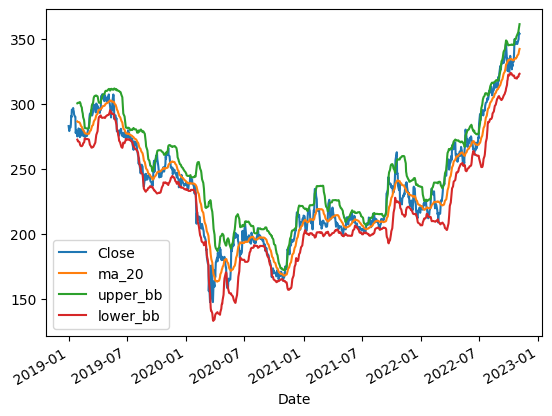

In [9]:
df[['Close','ma_20','upper_bb','lower_bb']].plot()

In [10]:
df['rsi'] = ta.momentum.rsi(df.Close,window=6)
conditions = [(df.rsi<30)&(df.Close<df.lower_bb),(df.rsi>70)&(df.Close>df.upper_bb)]
choices = ['Buy','Sell']
df['signal'] = np.select(conditions,choices)
df.dropna(inplace=True)
df.tail

<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-28  278.899994  279.450012  274.200012  274.750000  232.725113   
2019-01-29  275.299988  279.000000  274.750000  278.450012  235.859161   
2019-01-30  280.100006  280.200012  274.200012  275.500000  233.360397   
2019-01-31  276.500000  279.600006  273.600006  278.649994  236.028564   
2019-02-01  280.649994  285.200012  279.100006  280.850006  237.892090   
...                ...         ...         ...         ...         ...   
2022-10-31  348.000000  350.500000  344.750000  348.700012  348.700012   
2022-11-01  349.250000  350.500000  347.200012  349.500000  349.500000   
2022-11-02  348.500000  356.250000  348.500000  354.649994  354.649994   
2022-11-03  354.000000  358.500000  353.000000  353.700012  353.700012   
2022-11-04  354.000000  356.000000  352.500000  353.600006  353.600006   

       

In [11]:
for index,row in df.iterrows():
    print(row)

Open         278.899994
High         279.450012
Low          274.200012
Close            274.75
Adj Close    232.725113
Volume          8992136
ma_20        286.222501
vol            6.971698
upper_bb     300.165897
lower_bb     272.279104
rsi           19.792163
signal                0
Name: 2019-01-28 00:00:00, dtype: object
Open         275.299988
High              279.0
Low              274.75
Close        278.450012
Adj Close    235.859161
Volume          6998389
ma_20        286.010001
vol            7.147276
upper_bb     300.304552
lower_bb     271.715449
rsi           35.861883
signal                0
Name: 2019-01-29 00:00:00, dtype: object
Open         280.100006
High         280.200012
Low          274.200012
Close             275.5
Adj Close    233.360397
Volume         10449713
ma_20           285.755
vol            7.435615
upper_bb      300.62623
lower_bb      270.88377
rsi           30.093366
signal                0
Name: 2019-01-30 00:00:00, dtype: object
Open         

Open         259.950012
High         259.950012
Low               253.0
Close        254.100006
Adj Close    248.276306
Volume          8186859
ma_20        260.029999
vol            4.043006
upper_bb     268.116011
lower_bb     251.943987
rsi           39.038714
signal                0
Name: 2022-05-16 00:00:00, dtype: object
Open              255.0
High              265.5
Low          254.800003
Close        264.700012
Adj Close    258.633362
Volume         17797974
ma_20        259.759999
vol            3.475615
upper_bb     266.711228
lower_bb      252.80877
rsi           60.746206
signal                0
Name: 2022-05-17 00:00:00, dtype: object
Open              266.0
High         267.799988
Low          263.149994
Close        266.799988
Adj Close    260.685211
Volume         20200332
ma_20        260.022499
vol            3.800951
upper_bb       267.6244
lower_bb     252.420598
rsi            63.80983
signal                0
Name: 2022-05-18 00:00:00, dtype: object
Open         

In [12]:
df['shifted_Close']=df.Close.shift()

In [13]:
df.signal=df.signal.shift()
position = False
buydates,selldates = [],[]
buyprices,sellprices = [],[]
for index,row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
        
    if position:
        if row['signal'] == 'Sell' or row.shifted_Close<0.95*buyprices[-1]:
            selldates.append(index)
            sellprices.append(row.Open)
            position = False
        

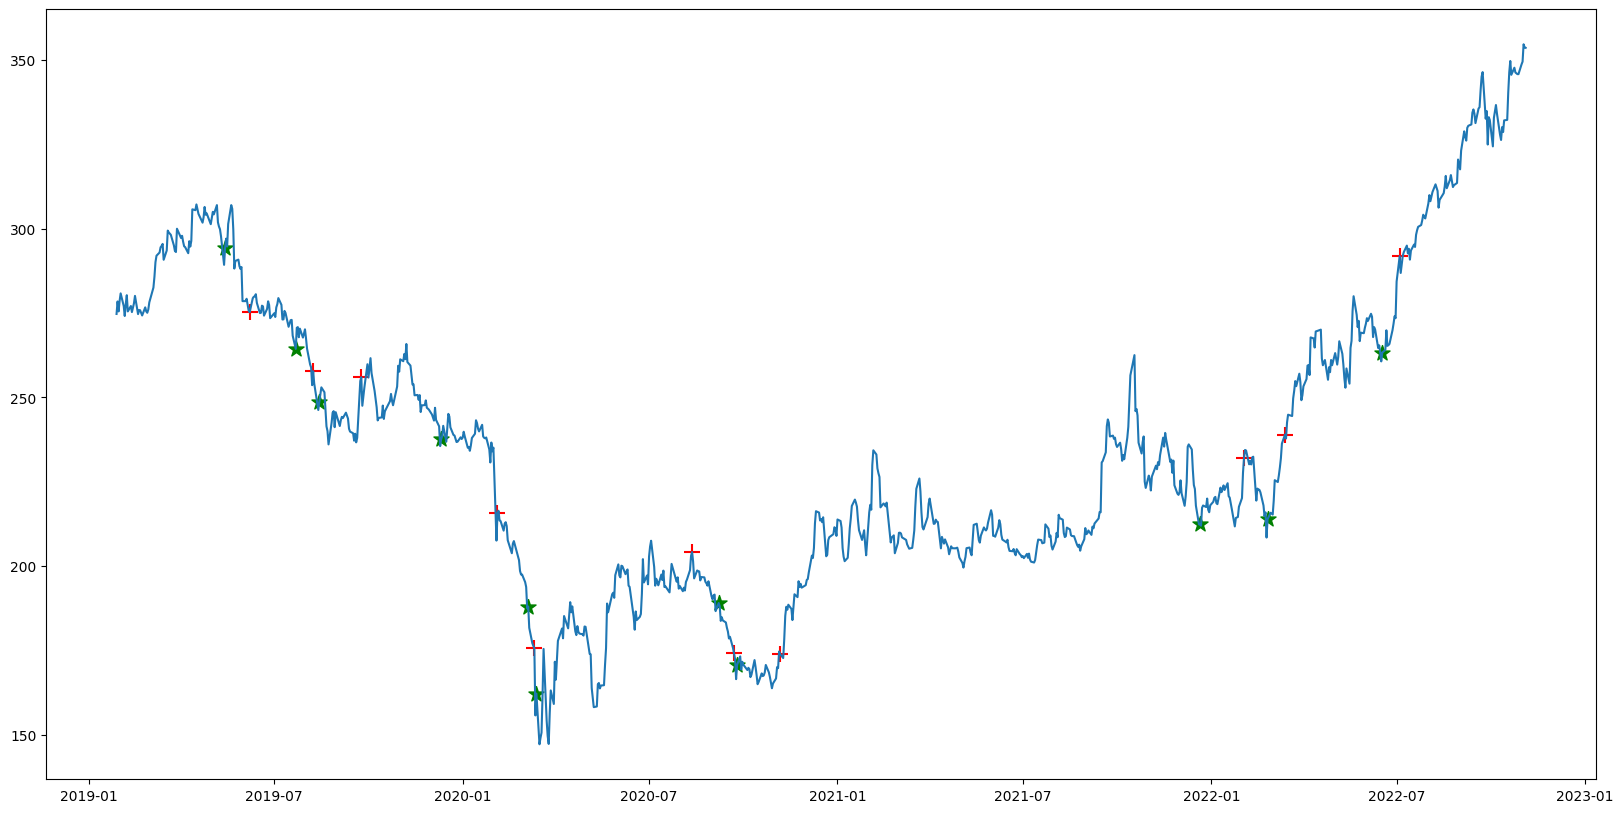

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index,df.loc[buydates].Close,marker='*',c='g',s=130)
plt.scatter(df.loc[selldates].index,df.loc[selldates].Close,marker='+',c='r',s=130)

In [18]:
(pd.Series([(sell)/buy for sell,buy in zip(sellprices,buyprices)])).prod()-1

0.36368489586151864